In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import minmax_scale
from kneed import KneeLocator

In [146]:
df = pd.read_csv("D:/Data Science/Machine Learning/Campusx/Data/fruits.csv")
df = df.iloc[:,1:3]
df = pd.DataFrame(minmax_scale(df),columns=df.columns)
df.head()

,sphericity,weight
0,1.000000,0.228916
1,0.873418,0.289157
2,0.898734,0.108434
3,0.869198,0.265060
4,0.983122,0.277108


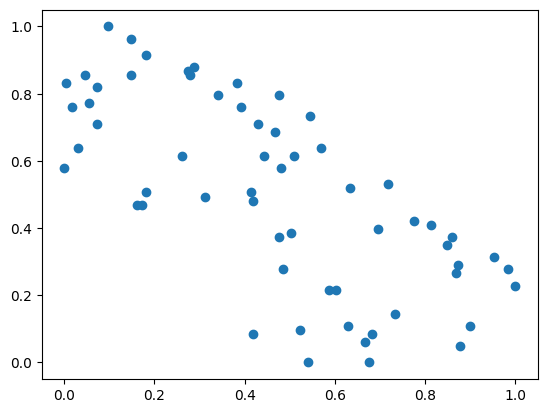

In [147]:
plt.scatter("sphericity","weight",data = df)
plt.show()

In [148]:
model = KMeans(n_clusters=2)
model.fit(df)
cluster = model.predict(df)
cluster

C:\Users\uday.sharma\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [149]:
centers = model.cluster_centers_
centers

array([[0.71573683, 0.24364123],
       [0.26275412, 0.71522453]])

In [150]:
df[cluster == 0].mean()

sphericity    0.715737
weight        0.243641
dtype: float64

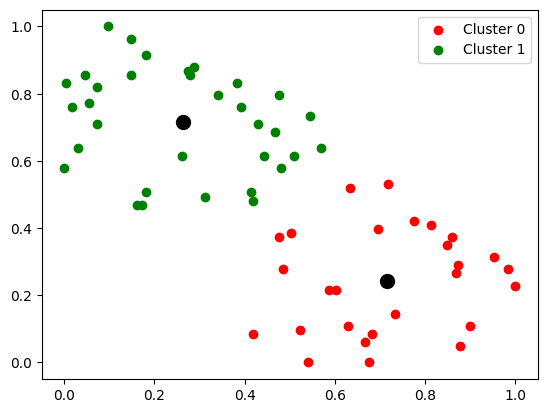

In [151]:
plt.scatter(x = 'sphericity',y = 'weight',data = df[cluster == 0],label = 'Cluster 0',c='red')
plt.scatter(x = 'sphericity',y = 'weight',data = df[cluster == 1],label = 'Cluster 1',c='green')
plt.scatter(centers[:,0],centers[:,1],c='black',s=100)
plt.legend()
plt.show()


In [152]:
c0 = np.sum(((df[cluster==0]['sphericity'] - centers[0,0])**2) + ((df[cluster==0]['weight'] - centers[0,1])**2))

In [153]:
c1 = np.sum(((df[cluster==1]['sphericity'] - centers[1,0])**2) + ((df[cluster==1]['weight'] - centers[1,1])**2))

In [154]:
c0+c1

3.117649685169754

In [155]:
model.inertia_

3.117649685169754

In [156]:
inertia = []

for k in range(1,11):
    model = KMeans(n_clusters=k)
    model.fit(df)
    inertia.append(model.inertia_)

C:\Users\uday.sharma\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\uday.sharma\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\uday.sharma\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\uday.sharma\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416:

[]

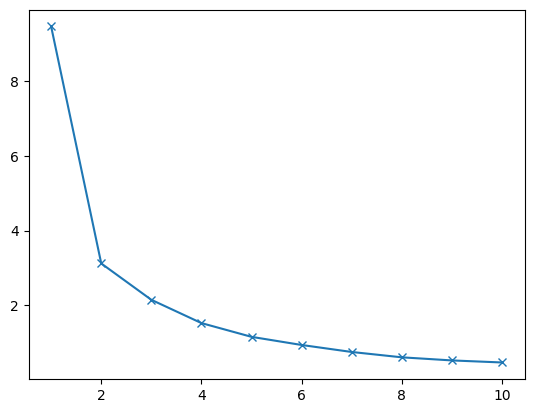

In [157]:
plt.plot(range(1,11),inertia,marker = 'x')
plt.plot()

In [158]:
knee_locate = KneeLocator(range(1,11),inertia,curve='convex',direction='decreasing')
knee_locate.elbow

2

In [159]:
from sklearn.metrics import silhouette_score

In [160]:
silhouette_score(df,cluster)

0.5416823092715296

In [161]:
silhote = []
for i in range(2,11):
    model = KMeans(n_clusters=i)
    model.fit(df)
    cluster = model.predict(df)
    silhote.append(silhouette_score(df,cluster))
    



C:\Users\uday.sharma\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\uday.sharma\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\uday.sharma\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\uday.sharma\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416:

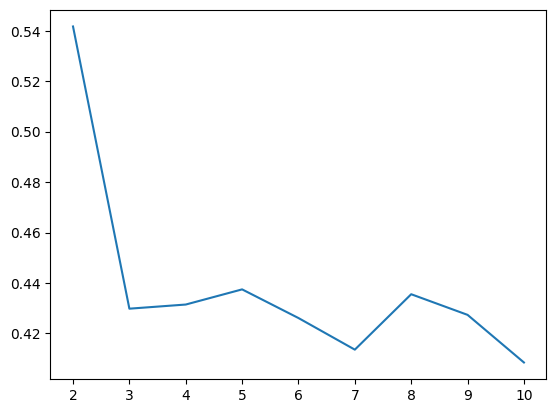

In [162]:
plt.plot(range(2,11),silhote)
plt.show()

In [163]:
silhote

[0.5416823092715296,
 0.42983324313246973,
 0.43147319398643375,
 0.4374821922288755,
 0.4261221831095365,
 0.4135917492511323,
 0.43556035918135577,
 0.42738118658053353,
 0.4085095239185097]

In [164]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


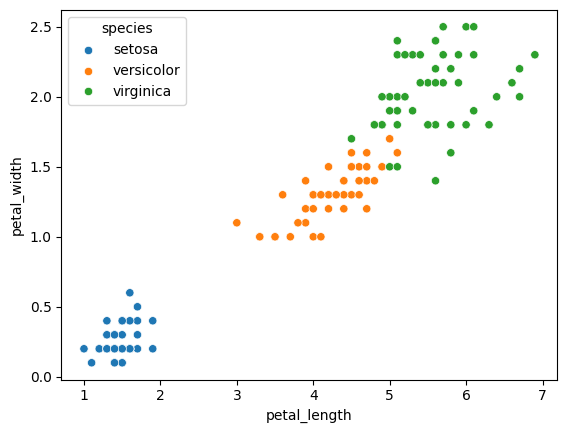

In [165]:
sns.scatterplot(x="petal_length",y="petal_width",data = iris,hue='species')
plt.show()

In [166]:
X = iris[['petal_length','petal_width']]
X = pd.DataFrame(minmax_scale(X),columns=X.columns)
X.head()

,petal_length,petal_width
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667


In [167]:
model = KMeans(n_clusters=2)
model.fit(X)
cluster = model.predict(X)
cluster

C:\Users\uday.sharma\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [168]:
silhouette_score(X,cluster)

0.7417156601556576

In [169]:
silhote = []
inertia = []
for i in range(1,11):
    model = KMeans(n_clusters=i)
    model.fit(X)
    inertia.append(model.inertia_)

for i in range(2,11):
    model = KMeans(n_clusters=i)
    model.fit(X)
    cluster = model.predict(X)
    silhote.append(silhouette_score(X,cluster))

C:\Users\uday.sharma\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\uday.sharma\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\uday.sharma\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\uday.sharma\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416:

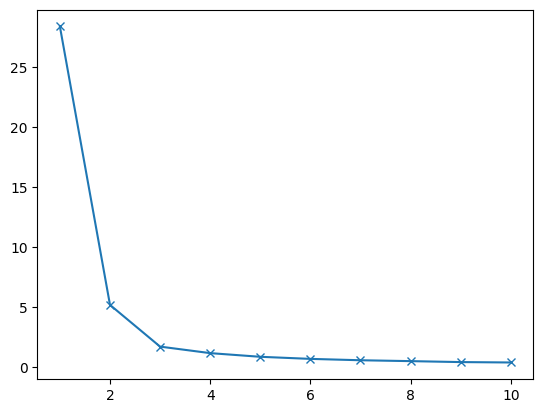

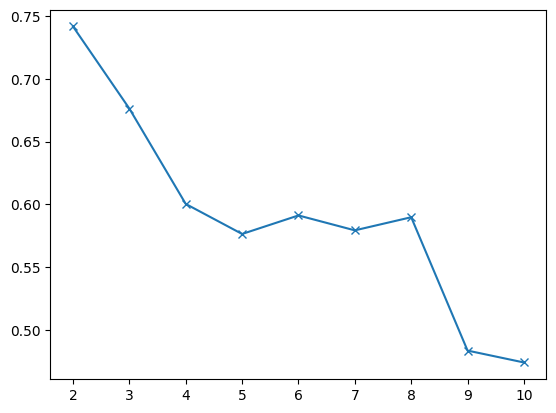

In [170]:
plt.plot(range(1,11),inertia,marker='x')
plt.show()
plt.plot(range(2,11),silhote,marker='x')
plt.show()


In [171]:
knee_locate = KneeLocator(range(1,11),inertia,curve='convex',direction='decreasing')
knee_locate.elbow

3

In [172]:
sns = pd.read_csv("D:/Data Science/Machine Learning/Campusx/Data/sns.csv")

In [173]:
sns.shape

(15000, 40)

In [174]:
sns['gender'].value_counts().mean()

6831.5

In [175]:
sns.dropna(axis=0,inplace=True)

In [176]:
sns.head()

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
1,2007,F,17.41,49,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2007,F,17.511,41,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
4,2008,F,16.657,1,0,0,0,0,0,1,...,0,0,0,3,0,0,0,0,0,0
5,2008,M,18.034,32,0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2006,M,18.53,18,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [177]:
sns.gradyear.value_counts()

2006    3089
2008    3022
2007    3002
2009    2929
Name: gradyear, dtype: int64

In [178]:
sns.groupby('gradyear').size()

gradyear
2006    3089
2007    3002
2008    3022
2009    2929
dtype: int64

In [179]:
X = minmax_scale(sns[['gradyear']])

In [180]:
from sklearn.cluster import KMeans

In [181]:
model = KMeans(n_clusters=4)
model.fit(X)
cluster = model.predict(X)


C:\Users\uday.sharma\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [182]:
model.cluster_centers_

array([[6.66666667e-01],
       [2.99760217e-15],
       [3.33333333e-01],
       [1.00000000e+00]])

In [183]:
np.unique(cluster,return_counts=True)

(array([0, 1, 2, 3]), array([3022, 3089, 3002, 2929], dtype=int64))

In [184]:
inertia = []
silhote = []
for i in range(1,11):
    model = KMeans(n_clusters=i)
    model.fit(X)
    inertia.append(model.inertia_)

for i in range(2,11):
    model = KMeans(n_clusters=i)
    model.fit(X)
    cluster = model.predict(X)
    silhote.append(silhouette_score(X,cluster))

C:\Users\uday.sharma\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\uday.sharma\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\uday.sharma\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\uday.sharma\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416:

In [185]:
knee = KneeLocator(range(1,11),inertia,curve='convex',direction='decreasing')
knee.knee

2

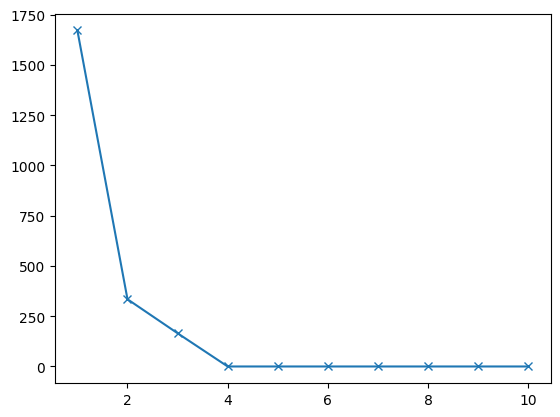

In [186]:
plt.plot(range(1,11),inertia,marker = 'x')
plt.show()

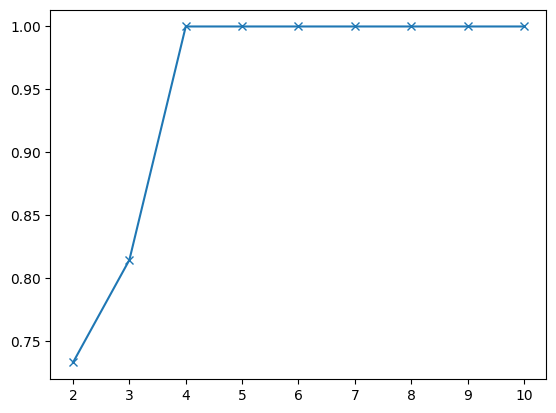

In [187]:
plt.plot(range(2,11),silhote,marker = 'x')
plt.show()

In [188]:
silhote

[0.7332797569006042, 0.8146939911988134, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]